# Exploration, Grouping, and Prediction of Genre in Spotify Songs
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan
GitHub Link: https://github.com/ketexon/csm148-spotiflies


The data set that we chose for the project was the Spotify dataset, which is a dataset with information about the popularity, genre, and several other musical qualities of over 140K songs on the Spotify music streaming platform. The link to the original dataset can be found here: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset.

The main feature we're interested in with this dataset is song genre, and how it relates to other features. We want to see if the musical qualities of a song are strong influences of what genre it's categorized. The dataset has 114 different genres, ranging from emo to classical to industrial and more. We are interested in answering questions regarding what, if anything, in songs may be a predictor of what genre it is, if certain genres are more similar to each other than others, and more. 

## First Looks and Cleaning Our Data
We started our project by investigating our data for any obvious cleaning we have to do before EDA, such as missing data or unreasonable values. 

In [42]:
%pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
from spotify_data import * 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Reading in the data
spotify = pd.read_csv("dataset.csv")
spotify

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


We decided to remove the "Unnamed: 0" column, since we can uniquely identify songs from their track_id, so the counter values aren't very useful.

In [45]:
spotify_clean = spotify.drop(columns=["Unnamed: 0"])

Then we looked into NA values, and found one observation. We decided to drop this row since along with missing values, it also has other unexpected/unreasonable statistics, such as popularity being 0, and a duration of 0.

In [46]:
print(spotify_clean.isna().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [47]:
# Looking specifically at the row of missing values
spotify_clean[spotify_clean.isna().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [48]:
# Dropping the row
spotify_clean = spotify_clean.dropna()

To investigate any unreasonable/odd values, we decided to visualize each numeric variable with boxplots.

In [49]:
# Helper function to remove all non-numeric columns
categorical_columns # These variables are categorical and coded with numeric values

def numeric(df: pd.DataFrame) -> pd.DataFrame:
    df_number = df.select_dtypes(include=[np.number])
    return df_number.loc[:,~df_number.columns.isin(categorical_columns)]

speechiness            Axes(0.125,0.11;0.110714x0.77)
acousticness        Axes(0.257857,0.11;0.110714x0.77)
instrumentalness    Axes(0.390714,0.11;0.110714x0.77)
liveness            Axes(0.523571,0.11;0.110714x0.77)
valence             Axes(0.656429,0.11;0.110714x0.77)
tempo               Axes(0.789286,0.11;0.110714x0.77)
dtype: object

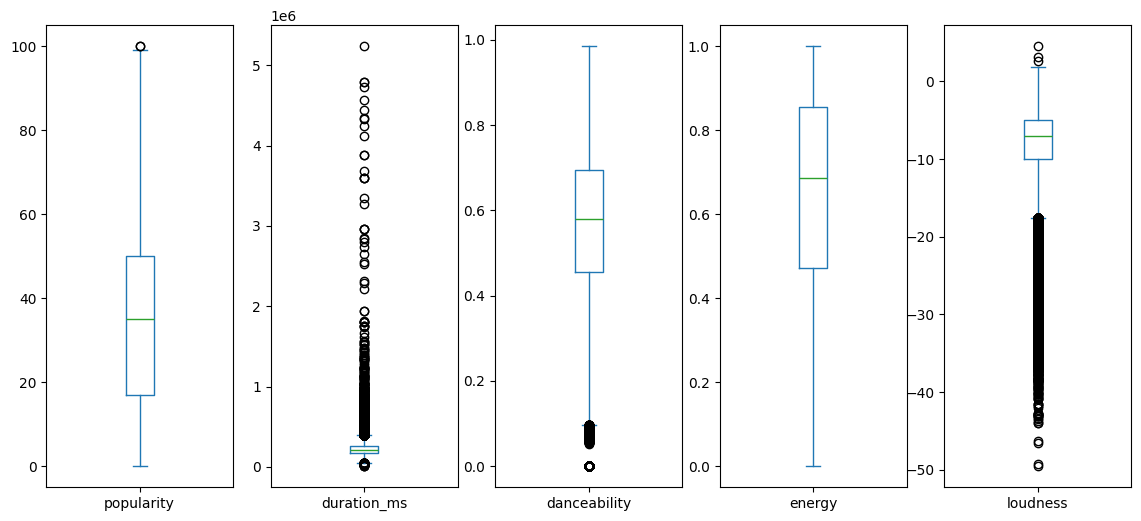

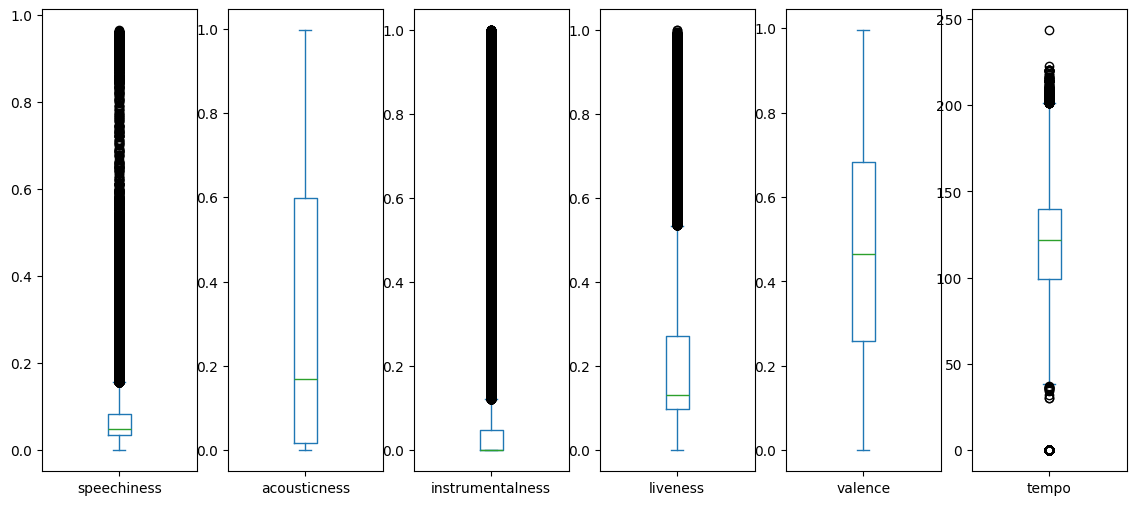

In [50]:
# Creating boxplots
numeric_spotify = numeric(spotify_clean)
columns = numeric_spotify.columns

numeric_spotify[columns[:len(columns) // 2]].plot.box(figsize = (14, 6), subplots=True)
numeric_spotify[columns[len(columns) // 2:]].plot.box(figsize = (14, 6), subplots=True)

Based on the boxplots, there seem to be quite a few numeric variables with a significant number of outliers. However, we decided to mainly only focus on the songs in which these outliers would be unreasonable based on domain knowledge, including duration being too low, the tempo being too slow, and the time signature being 0. 

First, we addressed the songs with duration being too low (the song is too short). We decided that a threshold for a song to be "too short" as a song that is shorter than 30 seconds.

In [51]:
short_songs = spotify_clean[spotify_clean['duration_ms'] < 30000]

print(f"Number of tracks with duration less than 30 seconds: {len(short_songs)}")
short_songs

Number of tracks with duration less than 30 seconds: 16


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11398,1egJZfc8JBT2blFQ4clPKe,Benjamin Britten;Steven Isserlis,October Classical Playlist,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",0,22266,False,0.335,0.0593,11,-26.365,0,0.0430,0.9920,0.8690,0.1160,0.1950,77.266,5,british
16288,1T5QvLF9lO4HO3OZQbaX9p,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.9850,0.9210,0.1640,0.9120,89.032,1,classical
16292,5viwzFJxwRE1OEUR7G6hiD,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.9930,0.8870,0.1440,0.4770,116.093,4,classical
16856,5YKCM3jbJ8lqUXUwfU7KwZ,Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,"Andante in C Major, K. 1a",0,17453,False,0.467,0.0301,2,-28.518,0,0.0428,0.9950,0.9000,0.1240,0.0000,84.375,4,classical
39233,1T5QvLF9lO4HO3OZQbaX9p,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.9850,0.9210,0.1640,0.9120,89.032,1,german
39236,5viwzFJxwRE1OEUR7G6hiD,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.9930,0.8870,0.1440,0.4770,116.093,4,german
59306,3qSaeaXmtOuzkqe7DKgoiM,Leila Bela,Angra Manyu,V-7,0,21120,False,0.229,0.0577,8,-27.960,0,0.1960,0.6260,0.9310,0.1080,0.2530,172.897,4,iranian
59310,6hsyfegVY5yklJneM40mWi,Leila Bela,Angra Manyu,The Exorsism Begins...,0,8586,False,0.000,0.0400,8,-29.714,0,0.0000,0.9280,0.9560,0.1150,0.0000,0.000,0,iranian
59434,1AsX7B48DFJZplJEwmhGpl,Alireza Mashayekhi;Ata Ebtekar;The Iranian Orc...,Ornamentalism,Aural Blue,0,24666,False,0.187,0.9750,1,-8.223,1,0.2360,0.0431,0.9800,0.3570,0.1360,96.548,4,iranian
59458,1sayezH8bWoxHMAQCccCTi,Leila Bela,Angra Manyu,V-3,0,28026,False,0.612,0.1370,8,-31.953,1,0.7920,0.8480,0.0000,0.0868,0.3930,100.765,4,iranian


We found that there are only 16 songs that are less than 30 seconds. Since there were so few, we decided to look manually into these songs and investigate whether or not these songs seem to be real songs. Turns out, the majority of them are concert pauses (empty tracks) or sound effects and sound clips. Since we don't want these tracks to affect our investigation of genres, we decided to drop them. 

In [52]:
spotify_clean = spotify_clean[spotify_clean['duration_ms'] >= 30000]

Next we looked at implausible 0 values with time signature and tempo. For context, time signature should be expressed in a fraction, while tempo is in BPM (so 0 BPM doesn't make sense). 

In [53]:
print("Tempos == 0: ", spotify_clean["tempo"].eq(0).sum())
print("Time signatures == 0: ", spotify_clean["time_signature"].eq(0).sum())

Tempos == 0:  155
Time signatures == 0:  161


In [54]:
tempo_timesig_0_songs = spotify_clean[(spotify_clean['tempo'] == 0) | (spotify_clean['time_signature'] == 0)]
tempo_timesig_0_songs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2926,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,8,-6.346,0,0.0516,0.238000,0.000325,0.0852,0.639,138.616,0,alt-rock
4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.000,0.03620,0,-22.519,0,0.0000,0.994000,0.940000,0.0958,0.000,0.000,0,ambient
4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.000,0.04450,0,-26.440,0,0.0000,0.972000,0.972000,0.0873,0.000,0.000,0,ambient
4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.000,0.03230,2,-23.636,0,0.0000,0.994000,0.973000,0.0922,0.000,0.000,0,ambient
26910,7HSc2wpHlXKIl8SCZK7zsP,Benny Martin,Here Comes the Sun (Piano Instrumental),Here Comes the Sun (Piano Instrumental),18,203705,False,0.329,0.06070,9,-28.310,1,0.0507,0.994000,0.880000,0.0858,0.421,93.948,0,disney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.000,0.02540,8,-19.925,1,0.0000,0.000002,0.838000,0.3390,0.000,0.000,0,sleep
112172,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,8,-6.346,0,0.0516,0.238000,0.000325,0.0852,0.639,138.616,0,turkish
113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.000,0.18800,8,-25.837,0,0.0000,0.139000,0.339000,0.1220,0.000,0.000,0,world-music
113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.000,0.00002,1,-11.165,1,0.0000,0.186000,1.000000,0.3620,0.000,0.000,0,world-music


We manually looked through the songs with time signature and tempos of 0, and found that most of them tended to be ambient tracks, such as tracks of rainfall sounds or white noise. We decided that it might be good to remove these rows from our cleaned dataset, as we didn't want to the zero values to skew the rest of our exploration in any way, and also because we hoped to look more a typical songs rather than ambient tracks. 

Additionally, the overall count of these suspicious rows wasn't very high compared to size of the entire dataset (163 vs > 114k), so we figured that removing these values wouldn't drastically affect the size and comprehensiveness of our dataset.

We also confirmed this decision by seeing how the means of some of the other variables would change based on if we removed or kept these suspicious rows (see below).

In [55]:
spotify_clean_temp = spotify_clean[spotify_clean['time_signature']!= 0]
spotify_clean_temp = spotify_clean[spotify_clean['tempo']!= 0]

mean_temp = spotify_clean_temp.mean(numeric_only=True)
mean_clean = spotify_clean.mean(numeric_only=True)

# Calculate the difference
mean_difference = mean_clean - mean_temp
mean_difference

popularity           0.006038
duration_ms        -73.741857
explicit            -0.000116
danceability        -0.000772
energy              -0.000706
key                 -0.000157
loudness            -0.018772
mode                 0.000072
speechiness         -0.000115
acousticness         0.000240
instrumentalness     0.000676
liveness             0.000327
valence             -0.000646
tempo               -0.166333
time_signature      -0.005316
dtype: float64

From this, the effects on the means by removing the suspicious rows doesn't seem to be too large, with the largest being duration, which is measured in milliseconds, so would actually be less than a second difference. Thus, we dropped the rows where time signature or tempo were 0, which was a total of 161 rows.

In [56]:
spotify_clean = spotify_clean_temp
spotify_clean

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Since there don't seem to be anymore values in our dataset that are unreasonable or missing, we exported our cleaned dataset to start exploring and visualizing our data.

In [57]:
# Exporting our cleaned dataset for analysis
spotify_clean.to_csv('spotify.csv', index=False) 

## Exploratory Data Analysis (EDA)

In order to find out a little more about the general structure and features of our dataset, we did some exploratory data analysis. We started by looking at the shape and structure of the data, and then the correlations between the numeric values, and then also did some visualizations of categorical features. 

In [58]:
# Read in the cleaned data
spotify = pd.read_csv('spotify.csv')
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113823,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113824,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113825,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113826,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [59]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113828.000000,1.138280e+05,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000,113828.000000
mean,33.237384,2.281340e+05,0.567603,0.642140,5.309186,-8.238433,0.637488,0.084758,0.314602,0.155314,0.213220,0.474737,122.317259,3.909460
std,22.314498,1.062882e+05,0.172371,0.250761,3.559470,4.991371,0.480728,0.105735,0.332302,0.308835,0.189925,0.258831,29.653245,0.407685
min,0.000000,3.008000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000
25%,17.000000,1.742130e+05,0.456000,0.473000,2.000000,-10.000250,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.432750,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.024000,4.000000
75%,50.000000,2.615970e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047600,0.273000,0.683000,140.078000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [60]:
# Select only numeric columns (remove categorical ones) using numeric() function written in data cleaning section
# Removed categorical columns: key, time signature, mode
numeric_spotify = numeric(spotify)

We started by looking at the distributions of all of the numeric variables with a histogram.

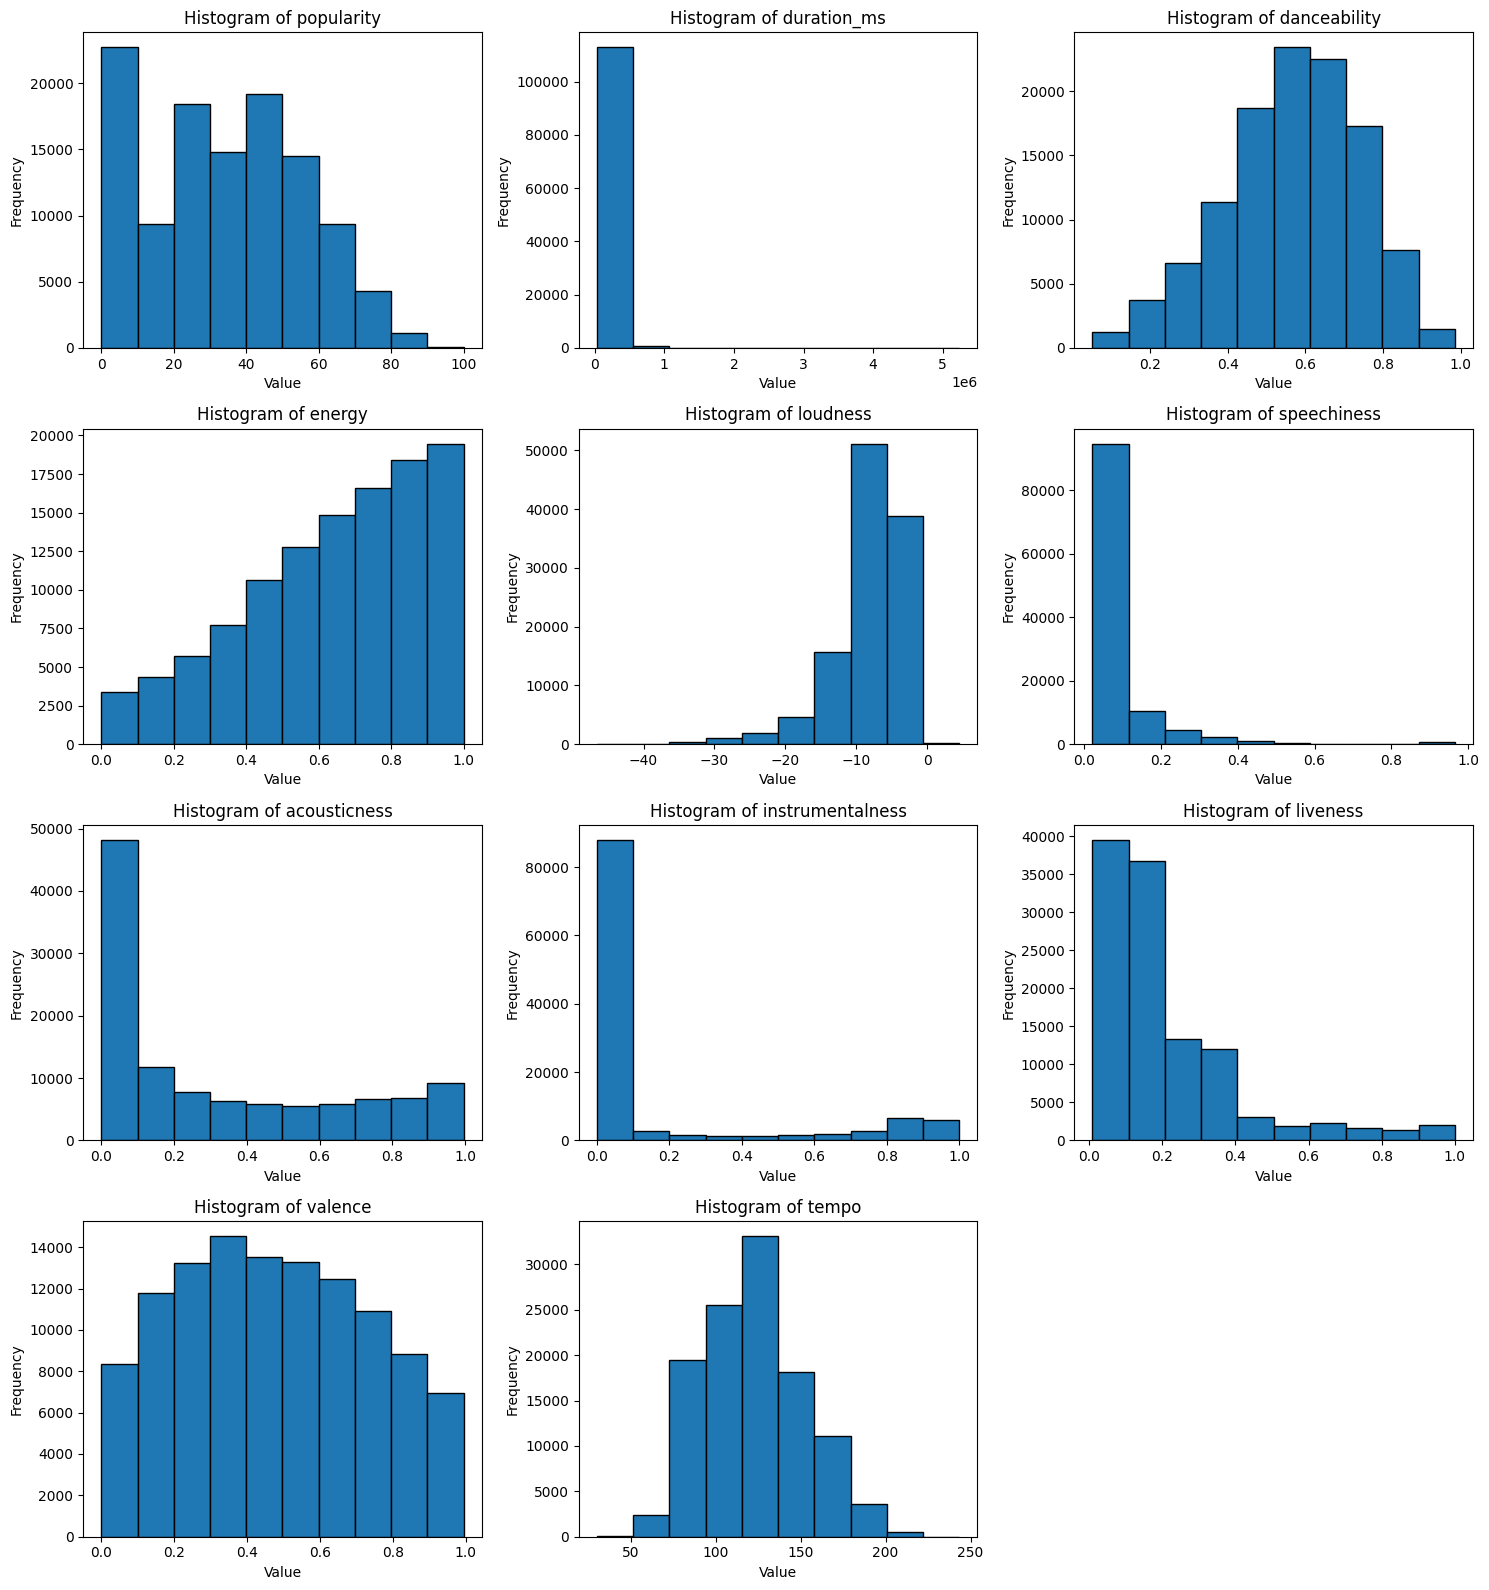

In [61]:
# Number of rows and columns for subplots (adjust as needed)
num_columns = len(numeric_spotify.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Adjusting number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # 3 columns for the layout
axes = axes.flatten() 

# Create a histogram for each variable
for i, column in enumerate(numeric_spotify.columns):
    ax = axes[i]
    numeric_spotify[column].hist(bins=10, edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(False)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  
plt.show()


Based on this, we definitely have a few variables that are extremely skewed. However, we decided not to transform the data to make it more normal because the most of the data is already on a scale between 0 and 1, and we didn't want to lose possible meaningful information. For example, in the description of the data, it describes the "speechiness" variable with "Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks", which would be lost if we were to correct the right-skew of the speechiness variable. 

We then decided to try to look at some relationships between variables by creating a correlation heatmap of every quantitative variable. 

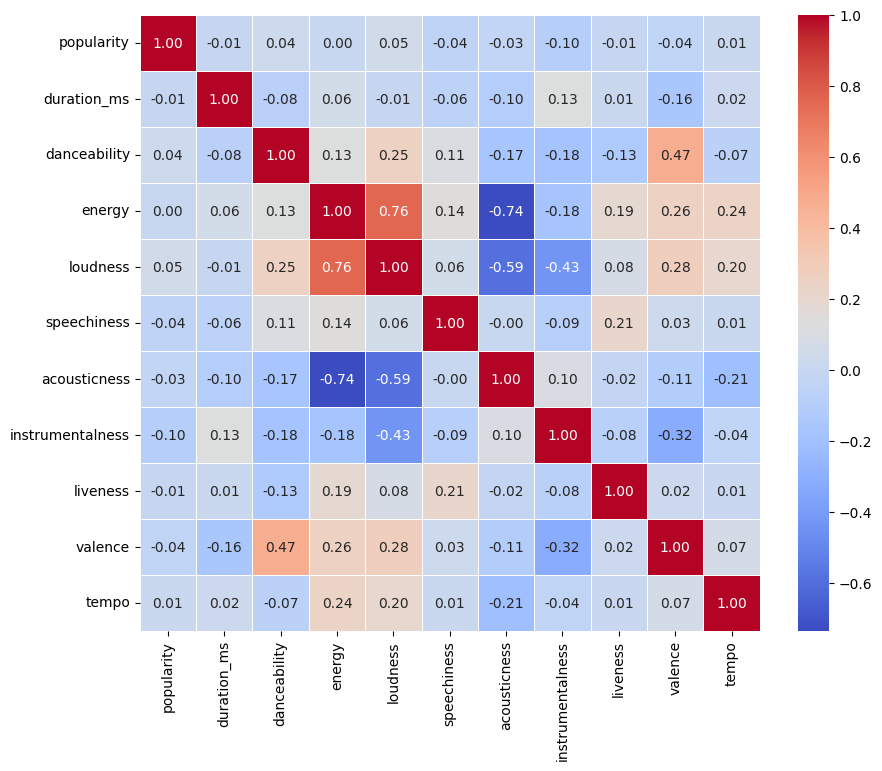

In [62]:
# Finding the correlation matrix
spotify_corr = numeric_spotify.corr()
spotify_corr

# Making correlation heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(spotify_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

Based on the heatmap of correlations, we wanted to see a more detailed scatterplots of the features that were more correlated. So, we decided to plot more detailed scatterplots of the correlations larger than 0.4 or smaller than -0.4. We then plotted a linear and quadratic regression for each.

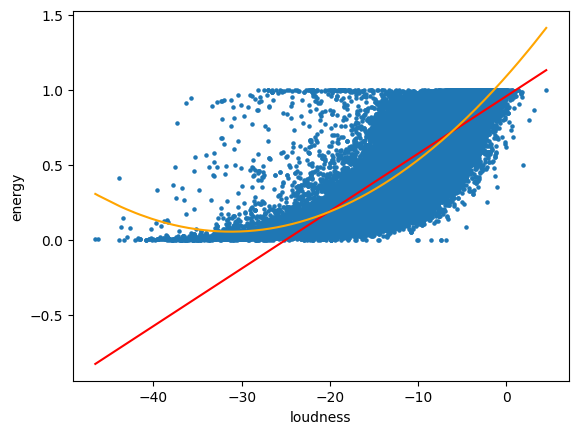

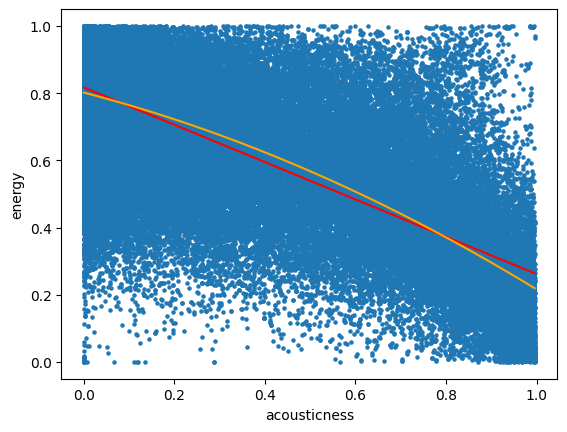

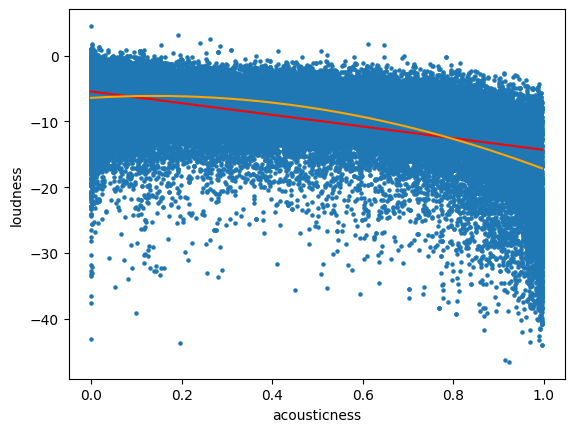

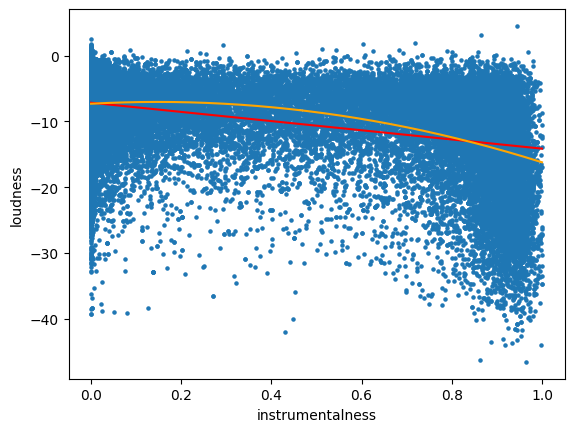

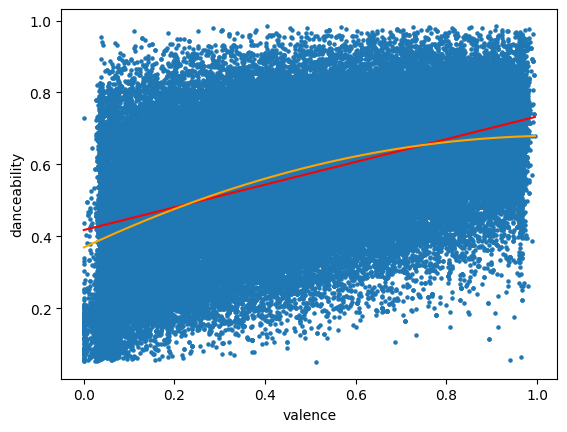

In [63]:
# Filtering out the pairs of higher correlated features
correlated_features = [
    ("loudness", "energy"),
    ("acousticness", "energy"),
    ("acousticness", "loudness"),
    ("instrumentalness", "loudness"),
    ("valence", "danceability"),
]

# Making scatterplots for each variable vs popularity 
for (i, j) in correlated_features:
    plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 1))(np.unique(numeric_spotify[i])), color='red')
    plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 2))(np.unique(numeric_spotify[i])), color='orange')
    plt.scatter(numeric_spotify[i], numeric_spotify[j], s=5)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

Though the variability from our fitted lines seemed pretty high on our scatterplots, some of the shapes of the graphs were pretty interesting. In particular, we thought the shapes of the (acousticness vs loudness), (instrumentalness vs loudness), (acousticness vs energy), and (energy vs loudness) graphs seemed to have a pretty distinct shape. The variables may have some sort of relationship with each other, which we noted in case they played some part in later sections of our exploration in our project. 

We also looked into the categorical variables (excluding genre, which we will go into a more detailed exploration of later).

In [64]:
# Selecting the categories: key, mode, explicit, time signature
spotify_categories = spotify[categorical_columns + ['explicit']]
spotify_categories = spotify_categories.drop(columns='track_genre')

# Mapping descriptions to the dataset based on the data description:
# 1. Key: If key == -1, then no key detected; otherwise, map integers to musical pitch names
key_mapping = {
    0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭', 4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G', 
    8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B', -1: 'No Key Detected'
}

# Map the 'key' column to pitch names
spotify_categories['key'] = spotify_categories['key'].map(key_mapping)

# 2. Mode: If mode is 0 or 1, we can leave it as is (1 for Major, 0 for Minor)
spotify_categories['mode'] = spotify_categories['mode'].map({0: 'Minor', 1: 'Major'})

# 3. Time Signature: You can directly describe the time signature if the range is between 3 and 7
spotify_categories['time_signature'] = spotify_categories['time_signature'].astype(str)

spotify_categories

,key,mode,time_signature,explicit
0,C♯/D♭,Minor,4,False
1,C♯/D♭,Major,4,False
2,C,Major,4,False
3,C,Major,3,False
4,D,Major,4,False
...,...,...,...,...
113823,F,Major,5,False
113824,C,Minor,4,False
113825,C,Minor,4,False
113826,G,Major,4,False


<Figure size 1200x1000 with 0 Axes>

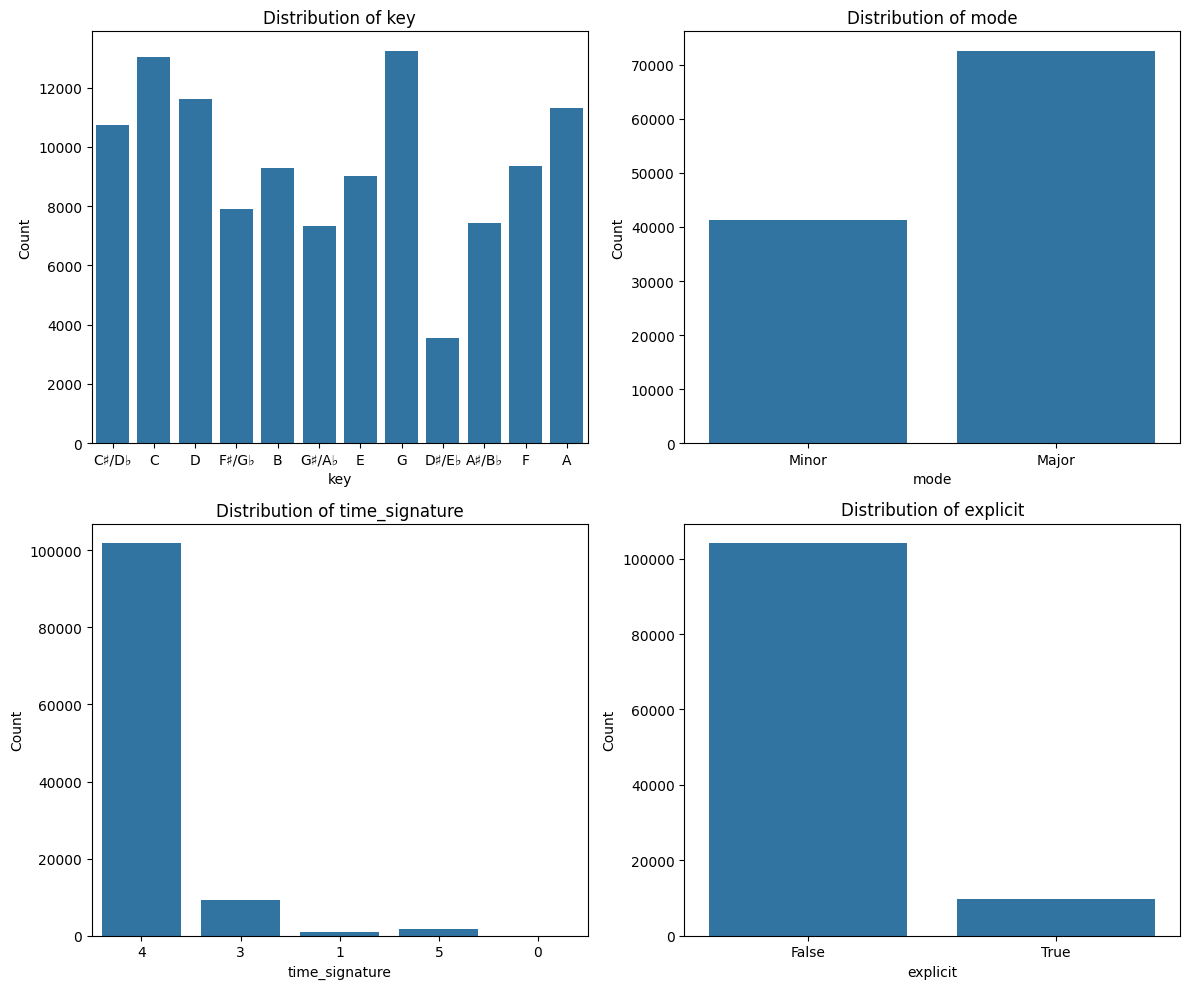

In [65]:
# Making barplots for each categorical value
# Set up the figure size for better readability
plt.figure(figsize=(12, 10))

# Create subplots for each categorical variable
num_columns = len(spotify_categories.columns)  # Get the number of columns
num_rows = (num_columns // 2) + (num_columns % 2 > 0)  # Adjust the number of rows

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # 2 columns for the layout
axes = axes.flatten()  # Flatten the axes for easy iteration

# Loop through each categorical variable to create a bar plot
for i, column in enumerate(spotify_categories.columns):
    ax = axes[i]
    sns.countplot(x=column, data=spotify_categories, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.grid(False)  # Disable gridlines

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the unused subplots

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Based on these visualizations it seems like the distributions for the key the song is in is fairly uniformly distributed, with D#/E♭ the least number of tracks. Additionally, most songs seem to be in major, have a 4/4 time signature, or non-explicit. 

After a more general exploration of some of the relationships and other features in our dataset, we decided to look closer into genre, the main focus of our project. 

In [66]:
genre_counts = spotify['track_genre'].value_counts()
print(genre_counts)

track_genre
acoustic       1000
psych-rock     1000
power-pop      1000
pop            1000
pop-film       1000
               ... 
ambient         997
world-music     997
guitar          996
iranian         990
sleep           861
Name: count, Length: 114, dtype: int64


We have 114 different genres, and they all seem fairly split. In fact, our dataset seems to have 1000 samples for each genre, as the genres that have less than 1000 samples are genres that we cleaned data values from. We looked further into the specific genres and names.

In [67]:
genre_names = spotify['track_genre'].unique()
print(genre_names)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

We saw that some genres were a lot more specific than others, for example, the genre of "pop" versus "disney", so we kept that in mind while doing later investigations and processing that we might want to group certain similar genres together, like grouping rock genres, pop genres, jazz, genres, etc. 

We also looked at how some of the other variables were distributed grouped by track genre to see if certain genres had differentiable characteristics. 

In [68]:
temp = spotify['track_genre']
by_genres = numeric(spotify)
by_genres['track_genre'] = temp

by_genres.groupby('track_genre').mean()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_genre,,,,,,,,,,,
acoustic,42.483000,214896.957000,0.549593,0.435368,-9.447843,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624
afrobeat,24.399000,248412.791000,0.669580,0.702812,-7.789353,0.086579,0.270860,0.253483,0.184596,0.698619,119.213337
alt-rock,33.943000,235455.907000,0.534493,0.754173,-6.191489,0.055071,0.122162,0.054097,0.210249,0.518260,124.634404
alternative,24.337000,222016.180000,0.559927,0.720030,-6.078777,0.070101,0.147820,0.038159,0.201376,0.495570,122.232394
ambient,44.151454,237478.207623,0.368974,0.237762,-18.584524,0.041687,0.776158,0.675362,0.129396,0.168002,111.447471
...,...,...,...,...,...,...,...,...,...,...,...
techno,39.042000,312311.477000,0.684348,0.746413,-8.077874,0.064212,0.081414,0.540038,0.159434,0.321878,128.255482
trance,37.635000,269007.478000,0.583409,0.845272,-6.329711,0.079705,0.035870,0.423501,0.234357,0.276881,133.276726
trip-hop,34.460000,274954.026000,0.634695,0.622363,-9.239915,0.076303,0.225615,0.383761,0.190342,0.478069,118.743616


In order to better visualize these results, we decided to group the genres even further (as visualizing the differences between 114 grouped genres may be unclear). To do so, we manually grouped the genres into 10 more over-arching, general genres:

- **Pop:**  cantopop, j-pop, k-pop, mandopop, pop, indie-pop, power-pop, pop-film, synth-pop  
- **Rock:**  alt-rock, alternative, hard-rock, punk-rock, psych-rock, rock, rock-n-roll, grunge, emo, rockabilly, guitar  
- **Metal:**  black-metal, death-metal, heavy-metal, metal, metalcore, grindcore  
- **Electronic:**  edm, electro, electronic, house, garage, techno, trance, dubstep, idm, minimal-techno, progressive-house, chicago-house, deep-house, detroit-techno, disco, drum-and-bass, dub, club, dance, dancehall  
- **Hip-Hop:**  hip-hop, rap, r-n-b, breakbeat  
- **Jazz:**  jazz, blues, soul, funk  
- **Classical:**  classical, opera, piano  
- **World:**  afrobeat, brazil, british, latin, latino, samba, salsa, reggae, reggaeton, tango, world-music, indian, iranian, turkish, malay, mpb, pagode, forro, french, german, spanish, swedish  
- **Folk:**  folk, bluegrass, country, singer-songwriter, songwriter, honky-tonk  
- **Misc:**  acoustic, ambient, anime, children, chill, comedy, disney, happy, party, study, sleep, show-tunes, new-age, kids, industrial, gospel, goth, groove, hardcore, hardstyle, indie, j-dance, j-idol, j-rock, punk, romance, sad, sertanejo, ska, trip-hop  


In [69]:
original_data = pd.read_csv('spotify.csv')

genre_groups = {
    'pop': ['cantopop', 'j-pop', 'k-pop', 'mandopop', 'pop', 'indie-pop', 'power-pop', 'pop-film', 'synth-pop'],
    'rock': ['alt-rock', 'alternative', 'hard-rock', 'punk-rock', 'psych-rock', 'rock', 'rock-n-roll', 'grunge', 'emo', 'rockabilly', 'guitar'],
    'metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore'],
    'electronic': ['edm', 'electro', 'electronic', 'house', 'garage', 'techno', 'trance', 'dubstep', 'idm', 'minimal-techno', 'progressive-house', 'chicago-house', 'deep-house', 'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'club', 'dance', 'dancehall'],
    'hip-hop': ['hip-hop', 'rap', 'r-n-b', 'breakbeat'],
    'jazz': ['jazz', 'blues', 'soul', 'funk'],
    'classical': ['classical', 'opera', 'piano'],
    'world': ['afrobeat', 'brazil', 'british', 'latin', 'latino', 'samba', 'salsa', 'reggae', 'reggaeton', 'tango', 'world-music', 'indian', 'iranian', 'turkish', 'malay', 'mpb', 'pagode', 'forro', 'french', 'german', 'spanish', 'swedish'],
    'folk': ['folk', 'bluegrass', 'country', 'singer-songwriter', 'songwriter', 'honky-tonk'],
    'misc': ['acoustic', 'ambient', 'anime', 'children', 'chill', 'comedy', 'disney', 'happy', 'party', 'study', 'sleep', 'show-tunes', 'new-age', 'kids', 'industrial', 'gospel', 'goth', 'groove', 'hardcore', 'hardstyle', 'indie', 'j-dance', 'j-idol', 'j-rock', 'punk', 'romance', 'sad', 'sertanejo', 'ska', 'trip-hop']
}

genre_map = dict()
for genre, l in genre_groups.items():
    for original in l:
        genre_map[original] = genre

data = original_data.copy()
data['track_genre'] = data['track_genre'].map(genre_map)

data.to_csv(
    "grouped_cleaned_spotify.csv",
    index=False
)

In [70]:
grouped_spotify = pd.read_csv("grouped_cleaned_spotify.csv")
grouped_spotify['track_genre'].value_counts()

track_genre
misc          29855
world         21984
electronic    20000
rock          10996
pop            8999
metal          6000
folk           6000
jazz           3999
hip-hop        3000
classical      2995
Name: count, dtype: int64

Though now we have some imbalance between the different genres, it is much easier for us to visualize the values. Looking again at the means:

In [71]:
temp = grouped_spotify['track_genre']
by_grouped_genres = numeric(grouped_spotify)
by_grouped_genres['track_genre'] = temp

grouped_genre_means = by_grouped_genres.groupby('track_genre').mean()
grouped_genre_means

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_genre,,,,,,,,,,,
classical,27.671452,223765.185309,0.383762,0.275876,-16.901773,0.048077,0.806379,0.432656,0.176999,0.303223,110.627554
electronic,33.197600,248895.600550,0.639240,0.732262,-7.033100,0.081552,0.127952,0.277755,0.183430,0.429510,125.833722
folk,28.781833,214844.595833,0.557295,0.484704,-9.592910,0.046643,0.528443,0.048824,0.178637,0.517899,120.840527
hip-hop,31.523000,249014.274000,0.665579,0.724645,-6.518481,0.101760,0.198716,0.138907,0.225048,0.553052,124.612911
jazz,24.223806,206378.017254,0.589357,0.525456,-8.722138,0.082673,0.453691,0.033780,0.181075,0.554460,115.426310
metal,30.441833,238321.365167,0.375544,0.893222,-5.626057,0.098494,0.017465,0.241315,0.251464,0.296137,126.118669
misc,33.303232,215820.325741,0.550929,0.612356,-9.087252,0.110584,0.370298,0.183654,0.237399,0.448685,121.849344
pop,43.204023,233893.756195,0.579996,0.622488,-7.588432,0.060236,0.331759,0.027006,0.180630,0.504335,123.051132
rock,35.846035,214174.379502,0.530928,0.664242,-7.773688,0.062274,0.271507,0.082378,0.205154,0.533833,124.113732


In [72]:
ranges = grouped_genre_means.max() - grouped_genre_means.min()
ranges

popularity             18.980217
duration_ms         42636.256746
danceability            0.290035
energy                  0.617346
loudness               11.275715
speechiness             0.063942
acousticness            0.788914
instrumentalness        0.405650
liveness                0.074465
valence                 0.258323
tempo                  15.491115
dtype: float64

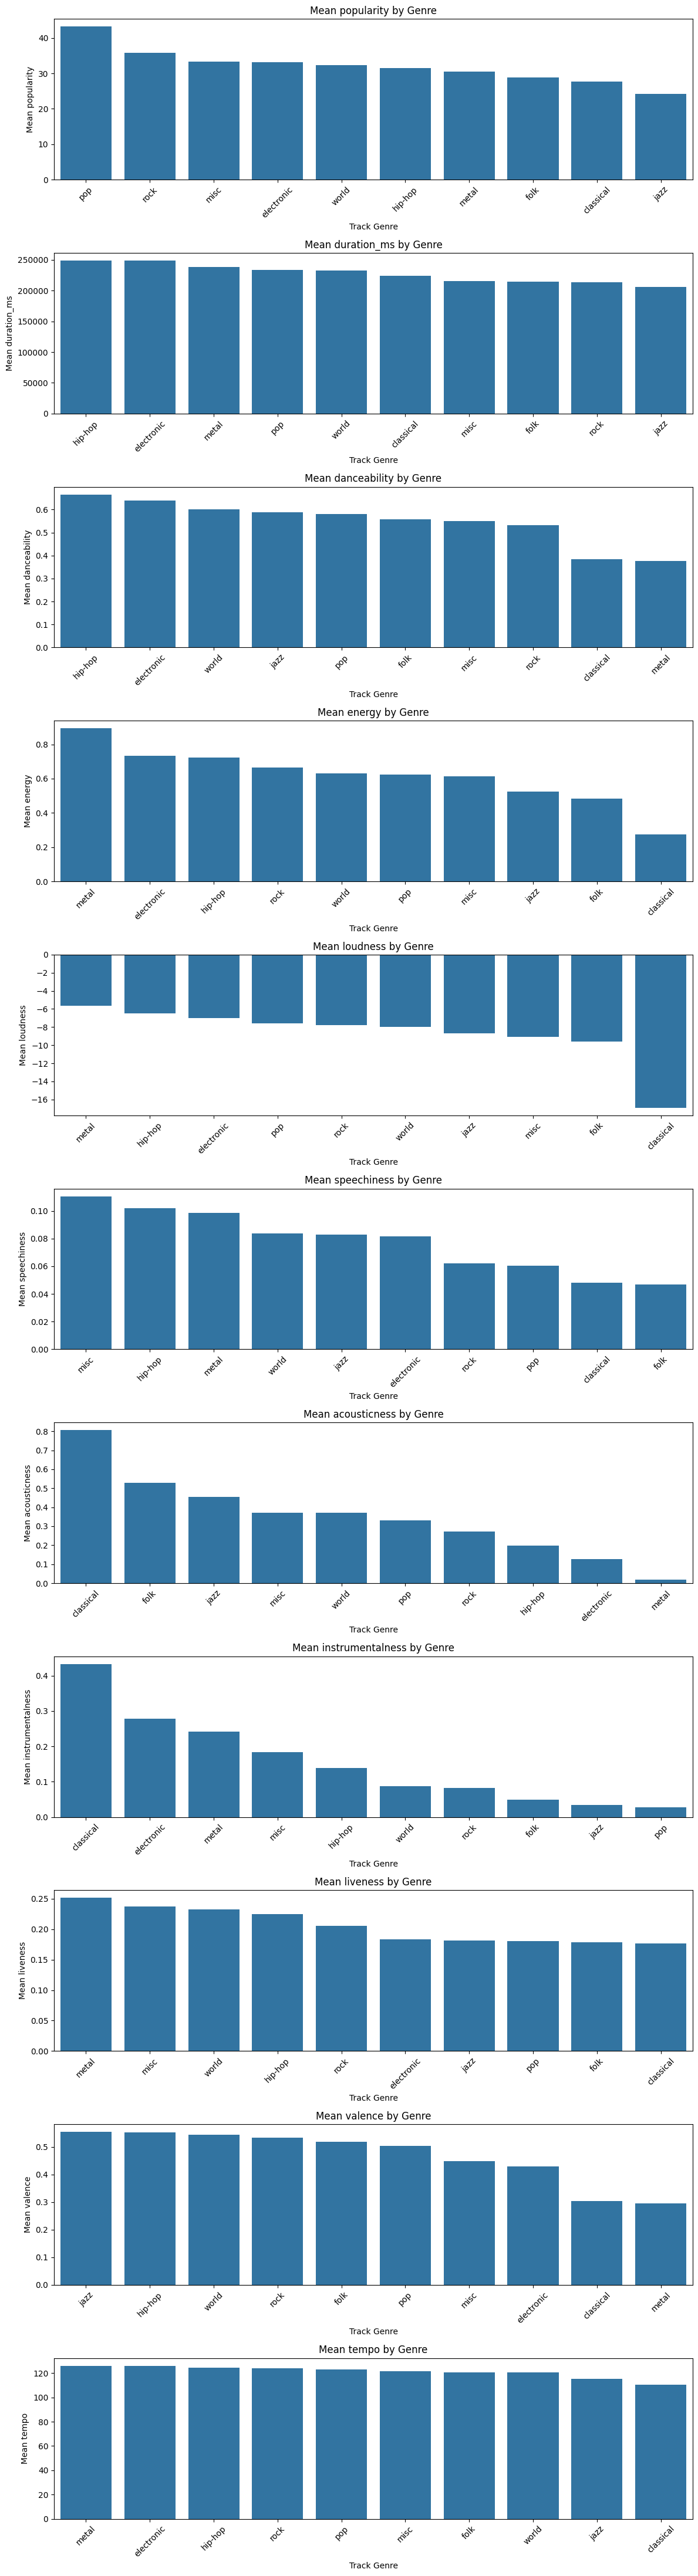

In [73]:
# Set up the figure for subplots
num_vars = len(grouped_genre_means.columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(12, num_vars * 4))

# Plot each variable as a barplot in its own subplot
for i, (column, ax) in enumerate(zip(grouped_genre_means.columns, axes)):
    # Sort values in descending order for the current column
    sorted_data = grouped_genre_means[column].sort_values(ascending=False)
    
    sns.barplot(
        x=sorted_data.index,
        y=sorted_data.values,
        ax=ax,
    )
    ax.set_title(f'Mean {column} by Genre')
    ax.set_xlabel('Track Genre')
    ax.set_ylabel(f'Mean {column}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From the above visualizations, we can make a few interesting observations about each variable:
- Pop music seems to be the most popular, though not necessarily by very much (around 5 points difference from rock).
- Duration doesn't seem to have that much variability across genres when considering the range of the means is about 43000ms, which is about a 42 second difference. However, hip-hop songs seem to be the longest in duration compared to other genres. 
- Classical and metal tracks seem to score lower on danceability scores compared to other genres, and hip-hop is the highest for danceability.
- Metal scores very high for energy levels, while classical seems to score lower.
- Similarly, metal scores high for loudness, while classical scores much lower. In this variable, loudness, the difference between classical and the rest of the variables is much more apparent.
- For the speechiness variable, folk and classical have the least amount of speechiness, while miscellaneous genres have the most.
- For acousticness, classical music scores very high while metal scores extremely low.
- With instrumentalness, classical music once again scores high, with pop and jazz scoring low.
- There doesn't seem to be too large of a difference in liveness across the variables, though metal does score the highest while classical scores the lowest.
- Surprisingly, metal and classical both score low on valence, with jazz, hip-hop, and world tracks scoring higher.
- Tempo seems to be fairly uniformly distributed across the genres, with classical and jazz barely scoring lower than the other genres.

In summary, it seems like classical tracks and metal tracks have the largest distinction between their variables, and the variables acousticness and instrumentalness seem to have the most variance across genres.

To investigate our genres in our dataset further, such as which features may play a role in the labelling of genres and if there's a way for us to predict the genre of a song based on its features, we can prepare our data for further model and training. We decided we didn't need to do any feature engineering since several of our variables already ranged from 0 to 1, some with meaningful values (as discussed in the cleaning section). We also didn't add any extra data through data augmentation because we already had over 100k samples, which we felt would be sufficient in our investigation. 

In order to prepare our data for more learning models, we split it into training, validation, and testing datasets (60-20-20). an example of how we split our data is in the code below, but we re-split it for each model for the sake of simplicity. We did this both for our original cleaned dataset and also our dataset grouped by our 10 generalized genres.

In [74]:
from sklearn.model_selection import train_test_split

# Setting the random seed for reproducability
random_seed = 42

# Original cleaned dataset, spotify
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=random_seed)
# Second split: separate remaining 80% into 60% training and 20% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Grouped genre dataset, grouped_spotify
# First split: separate out 20% for the test set
grouped_spotify_train_val, grouped_spotify_test = train_test_split(grouped_spotify, test_size=0.2, random_state=random_seed)
# Second split: separate remaining 80% into 60% training and 20% validation
grouped_spotify_train, grouped_spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

A summary of the datasets that result from the train-validation-test splitting is below:

Original 114 genre dataset:
- `spotify_train` (60% of the total dataset)
- `spotify_val` (20% of the total dataset)
- `spotify_test` (20% of the total dataset)

Re-grouped 10 genre dataset:
- `grouped_spotify_train` (60% of the total dataset)
- `grouped_spotify_val` (20% of the total dataset)
- `grouped_spotify_test` (20% of the total dataset)

## Linear + Polynomial Regression

For our linear regression, we chose to use the `energy` variable as our response variable, as it seemed to have the most relationships with other variables based on our correlation heatmap during our EDA, and we were interested in finding out what may contribute to the energy of a song.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.evaluate import bias_variance_decomp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from spotify_data import *

spotify = pd.read_csv("spotify.csv")
grouped_spotify = pd.read_csv("grouped_cleaned_spotify.csv")

To find out our predictor variables, we used forward feature selection to see which predictors may be most correlated with our response variable (energy).

In [76]:
response = "energy" # this was chosen based on correlation heatmap 

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=random_seed)
# Second split: separate remaining 80% into 60% training and 20% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Making sure only numeric variables are used:
num_spotify_train = numeric(spotify_train)
num_spotify_val = numeric(spotify_val)
num_spotify_test = numeric(spotify_test)

# Reshape the data to fit the model
X_train = num_spotify_train.drop(columns=response)
y = num_spotify_train[response]

lin_reg = LinearRegression()

# Select features
selector = SequentialFeatureSelector(
    lin_reg,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train, y)
selected_features = selector.get_feature_names_out(X_train.columns)
print("Selected Features: ", selected_features)

Selected Features:  ['loudness' 'acousticness' 'instrumentalness' 'liveness' 'valence']


Based on this we found that `'loudness', 'acousticness', 'instrumentalness', 'liveness',` and `'valence'` were our selected features, and graphed these with energy as the response variable to investigate the relationships.

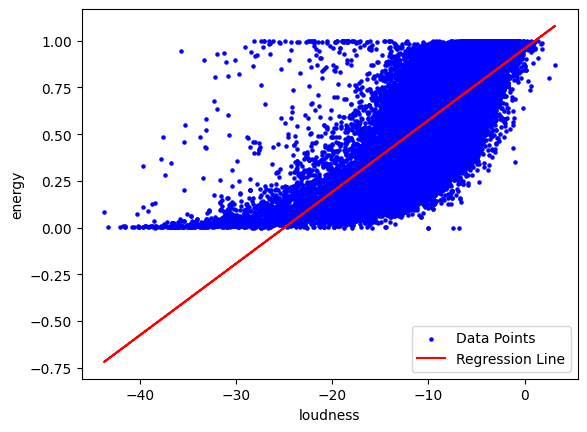

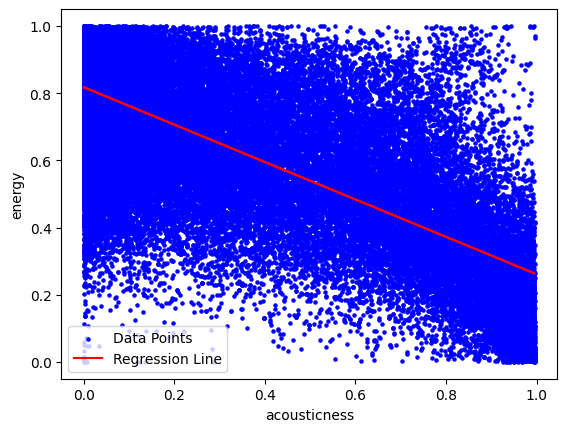

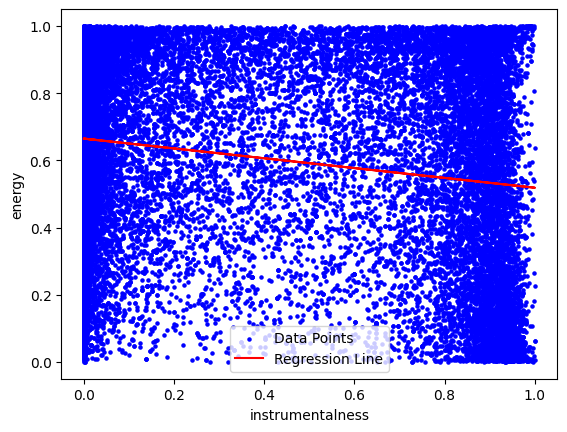

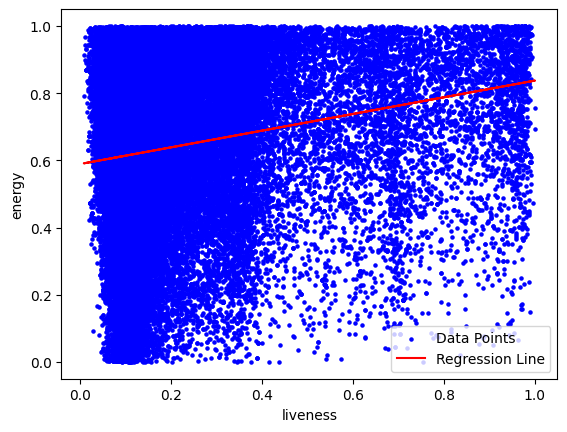

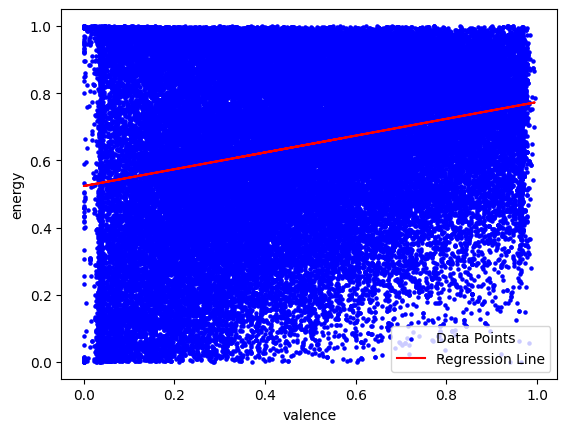

In [77]:
# Transform data sets
X = selector.transform(X_train)

X_test = selector.transform(num_spotify_test.drop(columns=response))
y_test = num_spotify_test[response]

X_val = selector.transform(num_spotify_val.drop(columns=response))
y_val = num_spotify_val[response]

# Fit the Linear Regression model
lin_reg.fit(X, y)

# Predict values of y based on the model
y_pred = lin_reg.predict(X)

# Plotting scatter plot with a regression line
for feature in selected_features:
    # Scatter plot of the data points
    plt.scatter(X_train[feature], y, color='blue', s=5, label="Data Points")
    
    # Calculate the regression line
    feature_values = X_train[feature].values.reshape(-1, 1)  # Get the feature values as an array
    temp_model = LinearRegression()  # Create a temporary Linear Regression instance
    temp_model.fit(feature_values, y)  # Fit the model for this specific feature
    y_line = temp_model.predict(feature_values)  # Predict y values using the temporary model
    
    # Plot the regression line
    plt.plot(feature_values, y_line, color='red', label="Regression Line")
    
    # Label axes and add a legend
    plt.xlabel(feature)
    plt.ylabel(response)
    plt.legend()
    
    # Show the plot
    plt.show()

Based on these graphs, some of our correlations are likely not linear, and others likely have a large amount of variance. We calculated the evaluation metrics for our linear regression model to see how it was performing. 

In [78]:
# Evaluation metrics from Week 3 Check-in
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.evaluate import bias_variance_decomp

# Calculating Evaluation Metrics:
y_val_pred = lin_reg.predict(X_val) # Predict on validation set

# Calculate metrics for the training set
train_mse = mean_squared_error(y, y_pred) # Mean squared error
train_rmse = np.sqrt(train_mse) # Root mean squared error
train_mae = mean_absolute_error(y, y_pred) # Mean average error
train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

# Calculate metrics for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mad = np.mean(np.abs(y_val - y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print Results:
print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

# bias variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    lin_reg,
    X, y.values,
    X_test, y_test.values,
    loss='mse',
    random_seed=123
)

print(f"Loss, variance, and bias: {avg_expected_loss}, {avg_bias}, {avg_var}")

Training MSE: 0.015919751417806476, rMSE: 0.12617349728768906, MAE: 0.09860151004869823, MAD: 0.09860151004869823, R²: 0.7477655716969742
Validation MSE: 0.016297699800804963, rMSE: 0.1276624447549277, MAE: 0.09952336547066758, MAD: 0.09952336547066758, R²: 0.7385932898496084
Loss, variance, and bias: 0.01592652204991807, 0.015924634631379178, 1.8874185388955218e-06


Based on the evaluation metrics we calculated above, our model seems to fit the data decently. Most notably, the MSE is very low and close together for the training and validation sets, 0.016 for both. This suggests there is low error and the model fits the data.

The R^2 values (0.743 and 0.746) are moderately strong, which indicates that the model is explaining a good amount of the variance in the dependent variable (energy). However, we know based on the graphs (that do not look very linear) that we could probably improve our model if we were to use a different model, such as a polynomial regression. However, since the exploration on energy doesn't necessarily contribute to our project goal, we decided to switch directions and look further into genre instead.

Though linear/polynomial regression isn't necessarily a model that aligns with our project goals (which focuses on investigating and predicting the genres, a categorical variable, or different songs), and thus we chose not to include it in our main report, we still did some light explorations of the relationships between our different variables for different genres using regression. 

In [300]:
# Make a dictionary for the data for efficiency
genre_groups = {genre: group for genre, group in spotify.groupby('track_genre')}
grouped_genre_groups = {genre: group for genre, group in grouped_spotify.groupby('track_genre')}

print(np.unique(spotify["track_genre"]))
print(np.unique(grouped_spotify['track_genre']))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae'
 'reggaeton' 'rock' 'rock-n-roll' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [301]:
# Selecting only the numeric features
numeric_spotify = spotify.select_dtypes(include=[np.number])
numeric_spotify = numeric_spotify.loc[:, ~numeric_spotify.columns.isin(["mode", "key", "time_signature"])]
numeric_spotify

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
113823,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113824,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113825,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113826,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


We'll start with using linear regression. We looked at the linear regression between each of the 114 genres and each other variable to see if there seemed to be any strong relationships. We investigated the R^2, variance, and bias for the fits.

In [302]:
numeric_dict = {
    'popularity': 0,
    'duration_ms': 0,
    'danceability': 0,
    'energy': 0,
    'loudness': 0,
    'speechiness': 0,
    'acousticness': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'valence': 0,
    'tempo': 0
}

In [303]:
# Modeling linear regression of genres to all other variables 

highest_r2 = 0
highest_r2_genre = ''
highest_r2_response = ''

for genre in genre_groups:
    df = genre_groups.get(genre, pd.DataFrame())
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.loc[:, ~numeric_df.columns.isin(["mode", "key", "time_signature"])]

    linear_reg = LinearRegression()

    # Select features
    selector = SequentialFeatureSelector(
            linear_reg,
            n_features_to_select='auto',
            direction='forward',
            scoring='r2',
            cv = 5
        )
    
    max_train_r2 = 0
    max_validation_r2 = 0
    max_response = ''
    
    for x in numeric_df.columns:
        random_seed = 42
        response = x
        # Splitting the data
        # First split: separate out 20% for the test set
        train_val, test = train_test_split(numeric_df, test_size=0.2, random_state=random_seed)

        # Second split: separate remaining 80% into 60% training and 40% validation
        train, val = train_test_split(train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

        # Reshape the data to fit the model
        X_train = train.drop(columns=response)
        y = train[response]


        selector.fit(X_train, y)
        selected_features = selector.get_feature_names_out(X_train.columns)
        # print("Selected Features: ", selected_features)

        # Transform data sets
        X = selector.transform(X_train)

        X_test = selector.transform(test.drop(columns=response))
        y_test = test[response]

        X_val = selector.transform(val.drop(columns=response))
        y_val = val[response]

        # Fit the Linear Regression model
        linear_reg.fit(X, y)

        # Predict values of y based on the model
        y_pred = linear_reg.predict(X)

        # Calculating Evaluation Metrics:
        y_val_pred = linear_reg.predict(X_val) # Predict on validation set

        # Calculate metrics for the training set
        train_mse = mean_squared_error(y, y_pred) # Mean squared error
        train_rmse = np.sqrt(train_mse) # Root mean squared error
        train_mae = mean_absolute_error(y, y_pred) # Mean average error
        train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
        train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

        # Calculate metrics for the validation set
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_mad = np.mean(np.abs(y_val - y_val_pred))
        val_r2 = r2_score(y_val, y_val_pred)

        # Print Results:
        print("")
        print(f"{genre} x {response} - Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
        print(f"{genre} x {response} - Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

        if val_r2 > max_validation_r2:
            max_train_r2 = train_r2
            max_validation_r2 = val_r2
            max_response = x

        # bias variance
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            linear_reg,
            X, y.values,
            X_test, y_test.values,
            loss='mse',
            random_seed=123
        )

        print(f"{genre} x {response} - Loss, Variance, and Bias: {avg_expected_loss}, {avg_bias}, {avg_var}")
    print("")
    print(f"Response Variable with the Highest Validation R^2 for {genre}: {max_response}")
    print(f"Train R^2 for {max_response} in {genre}: {max_train_r2}")
    print(f"Validation R^2 for {max_response} in {genre}: {max_validation_r2}")
    numeric_dict[max_response]+=1
    print("")
    print("-----")

    # Storing the variable / genre with the highest R^2 values
    if(max_validation_r2 > highest_r2):
        highest_r2 = max_validation_r2
        highest_r2_genre = genre
        highest_r2_response = response

print(numeric_dict)
print("")
print(f"The highest Validation R^2 was between {genre} and {response}, with a score of {highest_r2}.")


acoustic x popularity - Training MSE: 240.1301887882887, rMSE: 15.496134640234922, MAE: 11.938610575897625, MAD: 11.938610575897625, R²: 0.08202801149089911
acoustic x popularity - Validation MSE: 308.21524154571523, rMSE: 17.556059966453613, MAE: 13.063805517662317, MAD: 13.063805517662317, R²: 0.03376440332819031
acoustic x popularity - Loss, Variance, and Bias: 264.9212703269596, 262.7144247551956, 2.206845571764102

acoustic x duration_ms - Training MSE: 2334862607.908044, rMSE: 48320.416056859896, MAE: 37180.19783090932, MAD: 37180.19783090932, R²: 0.19322722623809274
acoustic x duration_ms - Validation MSE: 3164494809.2628613, rMSE: 56253.842617752445, MAE: 40015.50441524246, MAD: 40015.50441524246, R²: 0.06634947269482849
acoustic x duration_ms - Loss, Variance, and Bias: 3063600128.744078, 3028701412.797077, 34898715.94700089

acoustic x danceability - Training MSE: 0.012414960421764605, rMSE: 0.11142244128435082, MAE: 0.08970008412696966, MAD: 0.08970008412696966, R²: 0.15643

Based on our linear regression investigation, it seems like energy tended to have the highest validation correlation with various genres, with 101 genres that were correlated the most with energy compared to other features. Following energy, 11 genres were more correlated with loudness, and 1 genre for both speechiness and valence had highest correlations. The relationship that seemed to have the strongest linear correlation was between the world-music genre's variables, with the tempo variable as the response.

We decided to also try a quadratic regression on our data to see if the increase in degree may have any significant effects. 

In [305]:
# Define the degree of the polynomial, in this case, quadratic
degree = 2

# Create a pipeline for Polynomial Regression
poly_reg = make_pipeline(
    PolynomialFeatures(degree=degree),  # Generates polynomial features
    LinearRegression()                 # Fits a linear model to the transformed features
)

In [306]:
# Modeling quadratic regression (degree = 2) of genres to all other variables 

numeric_dict2 = {
    'popularity' : 0,
    'duration_ms' : 0,
    'danceability' : 0,
    'energy' : 0,
    'loudness' : 0,
    'speechiness' : 0,
    'acousticness' : 0,
    'instrumentalness' : 0,
    'liveness' : 0,
    'valence' : 0,
    'tempo' : 0
}

highest_r2 = 0
highest_r2_genre = ''
highest_r2_response = ''

for genre in genre_groups:
    df = genre_groups.get(genre, pd.DataFrame())
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.loc[:, ~numeric_df.columns.isin(["mode", "key", "time_signature"])]

    # Select features
    selector = SequentialFeatureSelector(
            linear_reg,
            n_features_to_select='auto',
            direction='forward',
            scoring='r2',
            cv = 5
        )
    
    max_train_r2 = 0
    max_validation_r2 = 0
    max_response = ''
    
    for x in numeric_df.columns:
        random_seed = 42
        response = x
        # Splitting the data
        # First split: separate out 20% for the test set
        train_val, test = train_test_split(numeric_df, test_size=0.2, random_state=random_seed)

        # Second split: separate remaining 80% into 60% training and 40% validation
        train, val = train_test_split(train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

        # Reshape the data to fit the model
        X_train = train.drop(columns=response)
        y = train[response]


        selector.fit(X_train, y)
        selected_features = selector.get_feature_names_out(X_train.columns)
        # print("Selected Features: ", selected_features)

        # Transform data sets
        X = selector.transform(X_train)

        X_test = selector.transform(test.drop(columns=response))
        y_test = test[response]

        X_val = selector.transform(val.drop(columns=response))
        y_val = val[response]


        # Fit the Polynomial Regression model
        poly_reg.fit(X, y)

        # Predict values of y based on the model
        y_pred = poly_reg.predict(X)

        # Calculating Evaluation Metrics:
        y_val_pred = poly_reg.predict(X_val) # Predict on validation set

        # Calculate metrics for the training set
        train_mse = mean_squared_error(y, y_pred) # Mean squared error
        train_rmse = np.sqrt(train_mse) # Root mean squared error
        train_mae = mean_absolute_error(y, y_pred) # Mean average error
        train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
        train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

        # Calculate metrics for the validation set
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_mad = np.mean(np.abs(y_val - y_val_pred))
        val_r2 = r2_score(y_val, y_val_pred)

        # Print Results:
        print("")
        print(f"{genre} x {response} - Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
        print(f"{genre} x {response} - Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

        if val_r2 > max_validation_r2:
            max_train_r2 = train_r2
            max_validation_r2 = val_r2
            max_response = x

        # bias variance
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            linear_reg,
            X, y.values,
            X_test, y_test.values,
            loss='mse',
            random_seed=123
        )

        print(f"{genre} x {response} - Loss, Variance, and Bias: {avg_expected_loss}, {avg_bias}, {avg_var}")
    print("")
    print(f"Response Variable with the Highest Validation R^2 for {genre}: {max_response}")
    print(f"Train R^2 for {max_response} in {genre}: {max_train_r2}")
    print(f"Validation R^2 for {max_response} in {genre}: {max_validation_r2}")
    numeric_dict2[max_response]+=1
    print("")
    print("-----")

    # Storing the variable / genre with the highest R^2 values
    if(max_validation_r2 > highest_r2):
        highest_r2 = max_validation_r2
        highest_r2_genre = genre
        highest_r2_response = response

print(numeric_dict)
print("")
print(f"The highest Validation R^2 was between {genre} and {response}, with a score of {highest_r2}.")


acoustic x popularity - Training MSE: 238.36334924002847, rMSE: 15.43902034586484, MAE: 11.82710415440354, MAD: 11.82710415440354, R²: 0.08878230265969056
acoustic x popularity - Validation MSE: 307.9668771079297, rMSE: 17.548985073443127, MAE: 13.020023325311787, MAD: 13.020023325311787, R²: 0.03454301038062635
acoustic x popularity - Loss, Variance, and Bias: 264.9212703269596, 262.7144247551956, 2.206845571764102

acoustic x duration_ms - Training MSE: 2218123169.954381, rMSE: 47096.95499662776, MAE: 36108.2707065063, MAD: 36108.2707065063, R²: 0.23356458906462185
acoustic x duration_ms - Validation MSE: 4964752876.611126, rMSE: 70461.00252346063, MAE: 42569.36859108882, MAD: 42569.36859108882, R²: -0.46479751763840094
acoustic x duration_ms - Loss, Variance, and Bias: 3063600128.744078, 3028701412.797077, 34898715.94700089

acoustic x danceability - Training MSE: 0.009686388233505767, rMSE: 0.09841945048366084, MAE: 0.07813410628385767, MAD: 0.07813410628385767, R²: 0.341835593342

Compared to the linear regression earlier, the quadratic regression didn't seem to have much of a change at all, other than the highest validation R^2 value between the world-music genre's variables and tempo slightly increasing from 0.913 to 0.929.

We also tried linear regression with our 10 manually grouped genres rather than the original 114 to see if it would make a difference. 

In [307]:
# Modeling linear regression of 10 generalized genres to all other variables 

numeric_dict3 = {
    'popularity' : 0,
    'duration_ms' : 0,
    'danceability' : 0,
    'energy' : 0,
    'loudness' : 0,
    'speechiness' : 0,
    'acousticness' : 0,
    'instrumentalness' : 0,
    'liveness' : 0,
    'valence' : 0,
    'tempo' : 0
}

highest_r2 = 0
highest_r2_genre = ''
highest_r2_response = ''

for genre in grouped_genre_groups:
    df = grouped_genre_groups.get(genre, pd.DataFrame())
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.loc[:, ~numeric_df.columns.isin(["mode", "key", "time_signature"])]

    linear_reg = LinearRegression()

        # Select features
    selector = SequentialFeatureSelector(
            linear_reg,
            n_features_to_select='auto',
            direction='forward',
            scoring='r2',
            cv = 5
        )
    
    max_train_r2 = 0
    max_validation_r2 = 0
    max_response = ''
    
    for x in numeric_df.columns:
        random_seed = 42
        response = x
        # Splitting the data
        # First split: separate out 20% for the test set
        train_val, test = train_test_split(numeric_df, test_size=0.2, random_state=random_seed)

        # Second split: separate remaining 80% into 60% training and 40% validation
        train, val = train_test_split(train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

        # Reshape the data to fit the model
        X_train = train.drop(columns=response)
        y = train[response]


        selector.fit(X_train, y)
        selected_features = selector.get_feature_names_out(X_train.columns)
        # print("Selected Features: ", selected_features)

        # Transform data sets
        X = selector.transform(X_train)

        X_test = selector.transform(test.drop(columns=response))
        y_test = test[response]

        X_val = selector.transform(val.drop(columns=response))
        y_val = val[response]


        # Fit the Linear Regression model
        linear_reg.fit(X, y)

        # Predict values of y based on the model
        y_pred = linear_reg.predict(X)

        # Calculating Evaluation Metrics:
        y_val_pred = linear_reg.predict(X_val) # Predict on validation set

        # Calculate metrics for the training set
        train_mse = mean_squared_error(y, y_pred) # Mean squared error
        train_rmse = np.sqrt(train_mse) # Root mean squared error
        train_mae = mean_absolute_error(y, y_pred) # Mean average error
        train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
        train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

        # Calculate metrics for the validation set
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_mad = np.mean(np.abs(y_val - y_val_pred))
        val_r2 = r2_score(y_val, y_val_pred)

        # Print Results:
        print("")
        print(f"{genre} x {response} - Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
        print(f"{genre} x {response} - Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

        if val_r2 > max_validation_r2:
            max_train_r2 = train_r2
            max_validation_r2 = val_r2
            max_response = x

        # bias variance
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            linear_reg,
            X, y.values,
            X_test, y_test.values,
            loss='mse',
            random_seed=123
        )

        print(f"{genre} x {response} - Loss, Variance, and Bias: {avg_expected_loss}, {avg_bias}, {avg_var}")
    print("")
    print(f"Response Variable with the Highest Validation R^2 for {genre}: {max_response}")
    print(f"Train R^2 for {max_response} in {genre}: {max_train_r2}")
    print(f"Validation R^2 for {max_response} in {genre}: {max_validation_r2}")
    numeric_dict3[max_response]+=1
    print("")
    print("-----")

    # Storing the variable / genre with the highest R^2 values
    if(max_validation_r2 > highest_r2):
        highest_r2 = max_validation_r2
        highest_r2_genre = genre
        highest_r2_response = response

print(numeric_dict)
print("")
print(f"The highest Validation R^2 was between {genre} and {response}, with a score of {highest_r2}.")


classical x popularity - Training MSE: 409.5538649920468, rMSE: 20.23743721403594, MAE: 16.649613329876903, MAD: 16.649613329876903, R²: 0.1524512374519278
classical x popularity - Validation MSE: 453.0347128175749, rMSE: 21.284612113392505, MAE: 17.70795012929208, MAD: 17.70795012929208, R²: 0.09009619768049781
classical x popularity - Loss, Variance, and Bias: 478.7684567001427, 477.5738175243535, 1.1946391757891268

classical x duration_ms - Training MSE: 23259211823.02532, rMSE: 152509.71058599948, MAE: 79912.66569857589, MAD: 79912.66569857589, R²: 0.060117445018765814
classical x duration_ms - Validation MSE: 15974482242.514177, rMSE: 126390.19836409063, MAE: 75238.23808139907, MAD: 75238.23808139907, R²: 0.12368634230401687
classical x duration_ms - Loss, Variance, and Bias: 13823058293.1823, 13657732360.43811, 165325932.74419042

classical x danceability - Training MSE: 0.013546640795117314, rMSE: 0.11639003735336334, MAE: 0.09386229988717089, MAD: 0.09386229988717089, R²: 0.3

Compared to the results of our linear regression with the 114 genres, most genres still seemed like energy as the response variable had the highest correlation once again. And similar to before, the highest correlation was within the world genre with tempo as the response variable, though the validation R^2 dropped in comparison to the linear regression with 114 genres (from 0.913 to 0.892).

Because we weren't necessarily thrying to predict anything with our linear and polynomial regression models, and since most of them didn't seem to be doing so well that it suggested overfitting, we didn't think we needed to do regularization on our models. We used these models more for exploration rather than prediction.

However, if interested, we did do lasso and ridge regularization with our exploration of energy as a response variable, which can be found in the week 3 check-in.

## Logistic Regression

## KNN/Decision Trees/Random Forest

## PCA/Clustering

## Neural Networks